In [1]:
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Flatten, Bidirectional, Dropout
from tensorflow.keras.layers import TimeDistributed,RepeatVector
import numpy as np
        
    
class MultiStepModels:
    '''
    多时间步预测时间序列LSTM模型
    '''
    def __init__(self, train_seq, test_seq, sw_width, pred_length, features, epochs_num, verbose_set, flag=0): 
        '''
        初始化变量和参数
        '''
        self.train_seq = train_seq
        self.test_seq = test_seq
        self.sw_width = sw_width
        self.pred_length = pred_length
        
        self.features = features
        
        self.epochs_num = epochs_num
        self.verbose_set = verbose_set
        
        self.flag = flag
        
        self.X, self.y = [], []     
        
    def split_sequence(self):
        '''
        该函数实现多输入序列数据的样本划分
        '''
        for i in range(len(self.train_seq)):
            # 找到最后一个元素的索引，因为for循环中i从1开始，切片索引从0开始，切片区间前闭后开，所以不用减去1；
            end_index = i + self.sw_width
            # 找到需要预测指定时间步长的最后一个元素的索引；
            out_end_index = end_index + self.pred_length
            # 如果最后一个期望输出最后一个元素的索引大于序列中最后一个元素的索引则丢弃该样本；
            # 这里len(self.sequence)没有减去1的原因是：保证最后一个元素的索引恰好等于序列数据索引时，能够截取到样本；
            if out_end_index > len(self.train_seq) :
                break
                
            # 实现以滑动步长为1（因为是for循环），窗口宽度为self.sw_width的滑动步长取值；
            seq_x, seq_y = self.train_seq[i:end_index], self.train_seq[end_index:out_end_index]
            self.X.append(seq_x)
            self.y.append(seq_y)
            
        self.X, self.y = np.array(self.X), np.array(self.y)
        self.X = self.X.reshape((self.X.shape[0], self.X.shape[1], self.features))
        self.test_seq = self.test_seq.reshape((1, self.sw_width, self.features))

        if self.flag == 1:
            self.y = self.y.reshape((self.y.shape[0], self.y.shape[1], self.features))
        else:
            pass
        
        for i in range(len(self.X)):
            print(self.X[i], self.y[i])
        
        # print('X:\n{}\ny:\n{}\ntest_seq:\n{}\n'.format(self.X, self.y, self.test_seq))
        # print('X.shape:{}, y.shape:{}, test_seq.shape:{}\n'.format(self.X.shape, self.y.shape, self.test_seq.shape))
        
        return self.X, self.y, self.test_seq       

    def stacked_lstm(self):
        model = Sequential()
        model.add(LSTM(100, activation='relu', return_sequences=True, 
                       input_shape=(self.sw_width, self.features)))
        model.add(Dropout(0.5))
        model.add(LSTM(100, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(units=self.pred_length))
        model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
        print(model.summary())

        history = model.fit(self.X, self.y, epochs=self.epochs_num, verbose=self.verbose_set)

        model.save('./trained_model_packetloss_exp_dropout')

        import matplotlib.pyplot as plt
        train_loss = history.history['loss'][-1]
        print (f'train_loss: {train_loss}')
        plt.plot(history.history['loss'])

In [2]:
data_list = list()

for i in range (1, 50):
    with open (f'data/datafile{i}.txt') as _f:
        data = _f.read().split('\n')
        _d = data[1:-1]
    
    data_list.extend(_d)

final_list = list()
for i in range (int(len(data_list)/100)):
    _d = data_list[100*(i-1) : 100*i]
    loss_packets = len([_data for _data in _d if _data == 'None'])
    final_list.append(loss_packets)
final_list = np.array(final_list)
print(len(final_list))


dataset = final_list.astype(np.float32)
max_value = np.max(dataset)
min_value = np.min(dataset)
scalar = max_value - min_value
dataset = list(map(lambda x: x / scalar, dataset))

14700


-------以下为 【向量输出 LSTM 模型】 相关信息------
[[0.  ]
 [0.02]
 [0.02]
 [0.01]
 [0.01]
 [0.01]
 [0.  ]
 [0.01]
 [0.01]
 [0.  ]] [0. 0.]
[[0.02]
 [0.02]
 [0.01]
 [0.01]
 [0.01]
 [0.  ]
 [0.01]
 [0.01]
 [0.  ]
 [0.  ]] [0. 0.]
[[0.02]
 [0.01]
 [0.01]
 [0.01]
 [0.  ]
 [0.01]
 [0.01]
 [0.  ]
 [0.  ]
 [0.  ]] [0.   0.01]
[[0.01]
 [0.01]
 [0.01]
 [0.  ]
 [0.01]
 [0.01]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]] [0.01 0.  ]
[[0.01]
 [0.01]
 [0.  ]
 [0.01]
 [0.01]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.01]] [0.   0.02]
[[0.01]
 [0.  ]
 [0.01]
 [0.01]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.01]
 [0.  ]] [0.02 0.  ]
[[0.  ]
 [0.01]
 [0.01]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.01]
 [0.  ]
 [0.02]] [0.   0.01]
[[0.01]
 [0.01]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.01]
 [0.  ]
 [0.02]
 [0.  ]] [0.01 0.  ]
[[0.01]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.01]
 [0.  ]
 [0.02]
 [0.  ]
 [0.01]] [0. 0.]
[[0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.01]
 [0.  ]
 [0.02]
 [0.  ]
 [0.01]
 [0.  ]] [0.   0.02]
[[0.  ]
 [0.  ]
 [0.  ]
 [0.01]
 [0.  ]
 [0.0

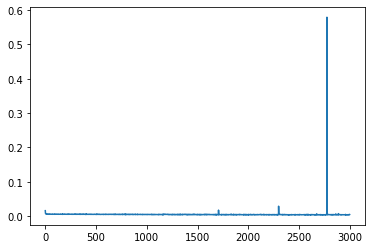

In [3]:
if __name__ == '__main__':
    
    train_seq = dataset[:int(len(dataset) * 0.7)]
    test_seq = np.array([0.1] * 10)
    
    sliding_window_width = 10
    predict_length = 2
    n_features = 1
    
    epochs_num = 3000
    verbose_set = 0
    
    print('-------以下为 【向量输出 LSTM 模型】 相关信息------')
    MultiStepLSTM = MultiStepModels(train_seq, test_seq, sliding_window_width, predict_length, n_features, 
                                      epochs_num, verbose_set)
    MultiStepLSTM.split_sequence()
    MultiStepLSTM.stacked_lstm()

In [64]:
import keras
model_3_2 = keras.models.load_model('trained_model_exponential_10input')

In [3]:
def window_split(dataset, look_back=10):
    dataX = list()
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
    return dataX

In [5]:
'''model testing
'''
import numpy as np

n = 100
with open ('data_new/datafile100.txt') as _f:
        data = _f.read().split('\n')
        data_200 = data[1:-1]
dataset_200 = list()
for i in range (int(len(data_200)/n)):
    _d = data_200[n*(i-1) : n*i]
    loss_packets = len([_data for _data in _d if _data == 'None'])
    dataset_200.append(loss_packets)
max_value = np.max(dataset_200)
min_value = np.min(dataset_200)
scalar = max_value - min_value
dataset_200 = list(map(lambda x: x / scalar, dataset_200))


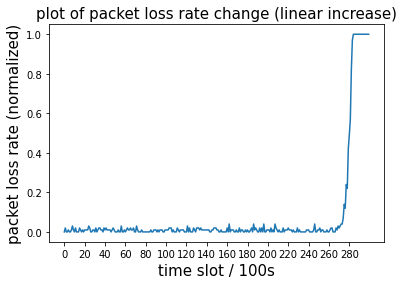

In [6]:
import matplotlib.pyplot as plt
_final_test = window_split(dataset_200)
font = {
    'size': 15,
}
plt.plot(dataset_200)
plt.xlabel('time slot / 100s', fontdict=font)
plt.ylabel('packet loss rate (normalized)', fontdict=font)
plt.xticks(np.arange(0, 300, 20))
plt.title('plot of packet loss rate change (linear increase)', fontdict=font)
plt.savefig('sample_orgPic/exp.png', dpi=300)

In [68]:
_sd = list()
num = 0
flg = 0
for _f in _final_test:
    num = num + 1
    _t =  np.array(_f)
    _test = _t.reshape((1, 10, 1))
    print (f'Data No.{num+9}:\noriginal data is:\n\t{_t}')
    pre_val = model_3_2.predict(_test)[0]
    print(f'predicted value based on the previous two:\n\t{pre_val}\n-----------------------------')
    for _p in pre_val:
        if _p > 0.1:
            flg = 1
    if flg == 1:
        print (
            f'''No. {num+9} time slot: ABNORMALY detected\
        \n\t!!!!!Depletion happened!!!!!!!'''
        )
        break

Data No.10:
original data is:
	[0.   0.02 0.   0.   0.01 0.   0.   0.01 0.03 0.01]
predicted value based on the previous two:
	[0.00832647 0.00939387]
-----------------------------
Data No.11:
original data is:
	[0.02 0.   0.   0.01 0.   0.   0.01 0.03 0.01 0.  ]
predicted value based on the previous two:
	[0.01002258 0.01157337]
-----------------------------
Data No.12:
original data is:
	[0.   0.   0.01 0.   0.   0.01 0.03 0.01 0.   0.02]
predicted value based on the previous two:
	[0.01021808 0.01177078]
-----------------------------
Data No.13:
original data is:
	[0.   0.01 0.   0.   0.01 0.03 0.01 0.   0.02 0.  ]
predicted value based on the previous two:
	[0.00841147 0.00914174]
-----------------------------
Data No.14:
original data is:
	[0.01 0.   0.   0.01 0.03 0.01 0.   0.02 0.   0.  ]
predicted value based on the previous two:
	[0.00917774 0.01099211]
-----------------------------
Data No.15:
original data is:
	[0.   0.   0.01 0.03 0.01 0.   0.02 0.   0.   0.  ]
predicted va

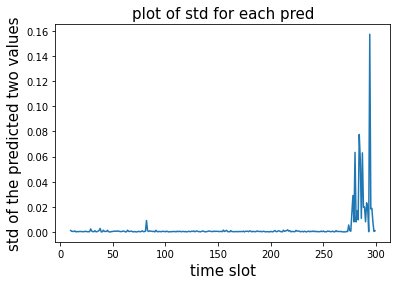

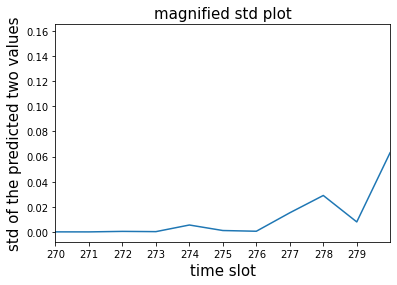

In [43]:
x = [n+10 for n in range(len(_sd))]
plt.plot(x, _sd)
plt.xlabel('time slot',fontdict=font)
plt.ylabel('std of the predicted two values',fontdict=font)
plt.title('plot of std for each pred', fontdict=font)
plt.savefig('std_10input_lin.png', dpi=300)
plt.figure()
plt.plot(x, _sd)
plt.xlim(270, 280)
plt.xlabel('time slot',fontdict=font)
plt.ylabel('std of the predicted two values',fontdict=font)
plt.title('magnified std plot',fontdict=font)
x_mag = np.arange(270, 280, 1)
plt.xticks(x_mag)
plt.savefig('std_mag_10input_lin.png', dpi=300)